In [39]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

import pickle

In [2]:
df = pd.read_csv("divorce.csv", sep=";")
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
dataset = df.values
labels = dataset[:, -1]
dataset = dataset[:, :-1]
dataset.shape

(170, 54)

In [4]:
def create_model(n_neurons = 10):
    model = Sequential()
    model.add(Dense(n_neurons, input_shape=(54,), activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = create_model()
model.fit(dataset, labels, epochs=100, batch_size=5)

with open("model.pickle", "wb+") as file:
    pickle.dump(model, file)

Epoch 1/100
34/34 [==============================] - 0s 902us/step - loss: 0.8041 - accuracy: 0.7235
Epoch 2/100
34/34 [==============================] - 0s 643us/step - loss: 0.2268 - accuracy: 0.9294
Epoch 3/100
34/34 [==============================] - 0s 647us/step - loss: 0.1894 - accuracy: 0.9412
Epoch 4/100
34/34 [==============================] - 0s 545us/step - loss: 0.1626 - accuracy: 0.9529
Epoch 5/100
34/34 [==============================] - 0s 679us/step - loss: 0.1464 - accuracy: 0.9647
Epoch 6/100
34/34 [==============================] - 0s 563us/step - loss: 0.1316 - accuracy: 0.9765
Epoch 7/100
34/34 [==============================] - 0s 571us/step - loss: 0.1209 - accuracy: 0.9765
Epoch 8/100
34/34 [==============================] - 0s 546us/step - loss: 0.1108 - accuracy: 0.9706
Epoch 9/100
34/34 [==============================] - 0s 553us/step - loss: 0.1029 - accuracy: 0.9765
Epoch 10/100
34/34 [==============================] - 0s 538us/step - loss: 0.0960 - accura

INFO:tensorflow:Assets written to: ram://0612a81e94e9441aa77d16192ffad32f/assets


INFO:tensorflow:Assets written to: ram://0612a81e94e9441aa77d16192ffad32f/assets


In [25]:
# feature importance using LinearRegression model with inbuilt cross-validation:
from sklearn.linear_model import LinearRegression

#create model:
model = LinearRegression()
#fit model:
model.fit(X=dataset, y=labels)
model.score(dataset, labels)

0.9695733294955916

<Axes: >

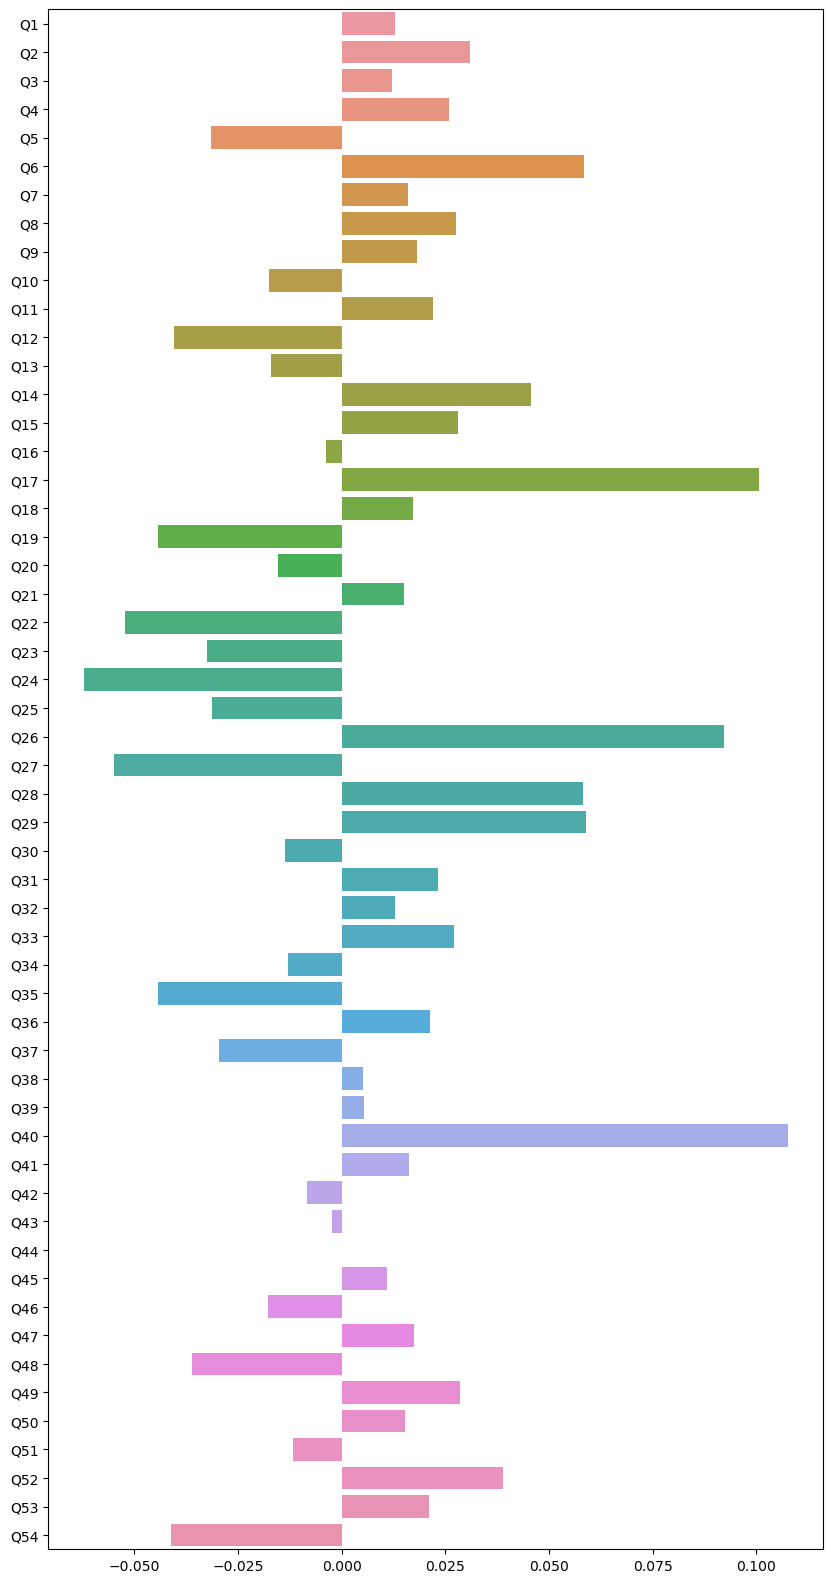

In [44]:
# create feature-importance out of coefficients:
question_array = np.array(df.columns.values.tolist()[:-1])

plt.figure(figsize=(10, 20))
sb.barplot(x=model.coef_, y=question_array, orient="h")